<a href="https://colab.research.google.com/github/Sha-diya/Data_Science_Projects/blob/main/Customer%20Segmentation/Customer_Segmentationipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
data=pd.read_csv('/content/marketing_campaign.csv',sep="\t")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


**Data Cleaning**

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

From the avobe information we can see that:
1. There have missing values in income
2. There have some categorical features that need to be encoded.
3. Dt_Customer should be DateTime but it is object


In [86]:
#remove null value
data=data.dropna()
print("Number of data points after removing null points:",len(data))

Number of data points after removing null points: 2216


In [87]:
data['Dt_Customer']=pd.to_datetime(data['Dt_Customer'],format='%d-%m-%Y')
dates=[]
for i in data['Dt_Customer']:
  i=i.date()
  dates.append(i)

print("Newest customer",max(dates))
print("Oldest customer",min(dates))

Newest customer 2014-06-29
Oldest customer 2012-07-30


Create a new feature with the value that represent for how long the customer is with the shope

In [88]:
#create feature Customer_For
days=[]
d1=max(dates)
for i in dates:
  delta=d1-i
  days.append(delta)

data['Customer_For']=days
data['Customer_For']=pd.to_numeric(data['Customer_For'],errors='coerce')

Now let's go throw categorical features Education     and Marital_Status

In [89]:
print('Categoris in education:\n',data['Education'].value_counts())
print('\nCategoris in Marital Status:\n',data['Marital_Status'].value_counts())

Categoris in education:
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

Categoris in Marital Status:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


<h1>Feature Engineering</h1>

In [90]:
#Find Age from Barth Year
current_year=pd.Timestamp.now().year
data['Age']=current_year-data['Year_Birth']

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [92]:
#create a new feature spent from spendings
data['Spent']=data['MntWines']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']

In [93]:
#new feature Living_With from Marital status
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner",
                                                    "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone",
                                                    "Divorced":"Alone", "Single":"Alone",})

#total number of children at home
data['Children']=data['Kidhome']+data['Teenhome']
#total number of peron living at home
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

<ipython-input-93-6f41b6c1eaf7>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]


In [94]:
#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#Segmenting education levels in three groups
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

In [95]:
data

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,57283200000000000,68,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,9763200000000000,71,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,26956800000000000,60,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,12009600000000000,41,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,13910400000000000,44,422,Partner,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,0,1,46,709,43,182,42,118,...,0,0,0,32918400000000000,58,1341,Partner,1,3,1
2236,Postgraduate,64014.0,2,1,56,406,0,30,0,0,...,0,0,0,1641600000000000,79,444,Partner,3,5,1
2237,Graduate,56981.0,0,0,91,908,48,217,32,12,...,0,0,0,13392000000000000,44,1241,Alone,0,1,0
2238,Postgraduate,69245.0,0,1,8,428,30,214,80,30,...,0,0,0,13478400000000000,69,843,Partner,1,3,1


In [96]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,3.054423e+16,56.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,1.749036e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,29.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,1.555200e+16,48.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,3.071520e+16,55.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,4.570560e+16,66.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,6.039360e+16,132.000000,2525.000000,3.000000,5.000000,1.000000


Now plot to see if there have any outliers

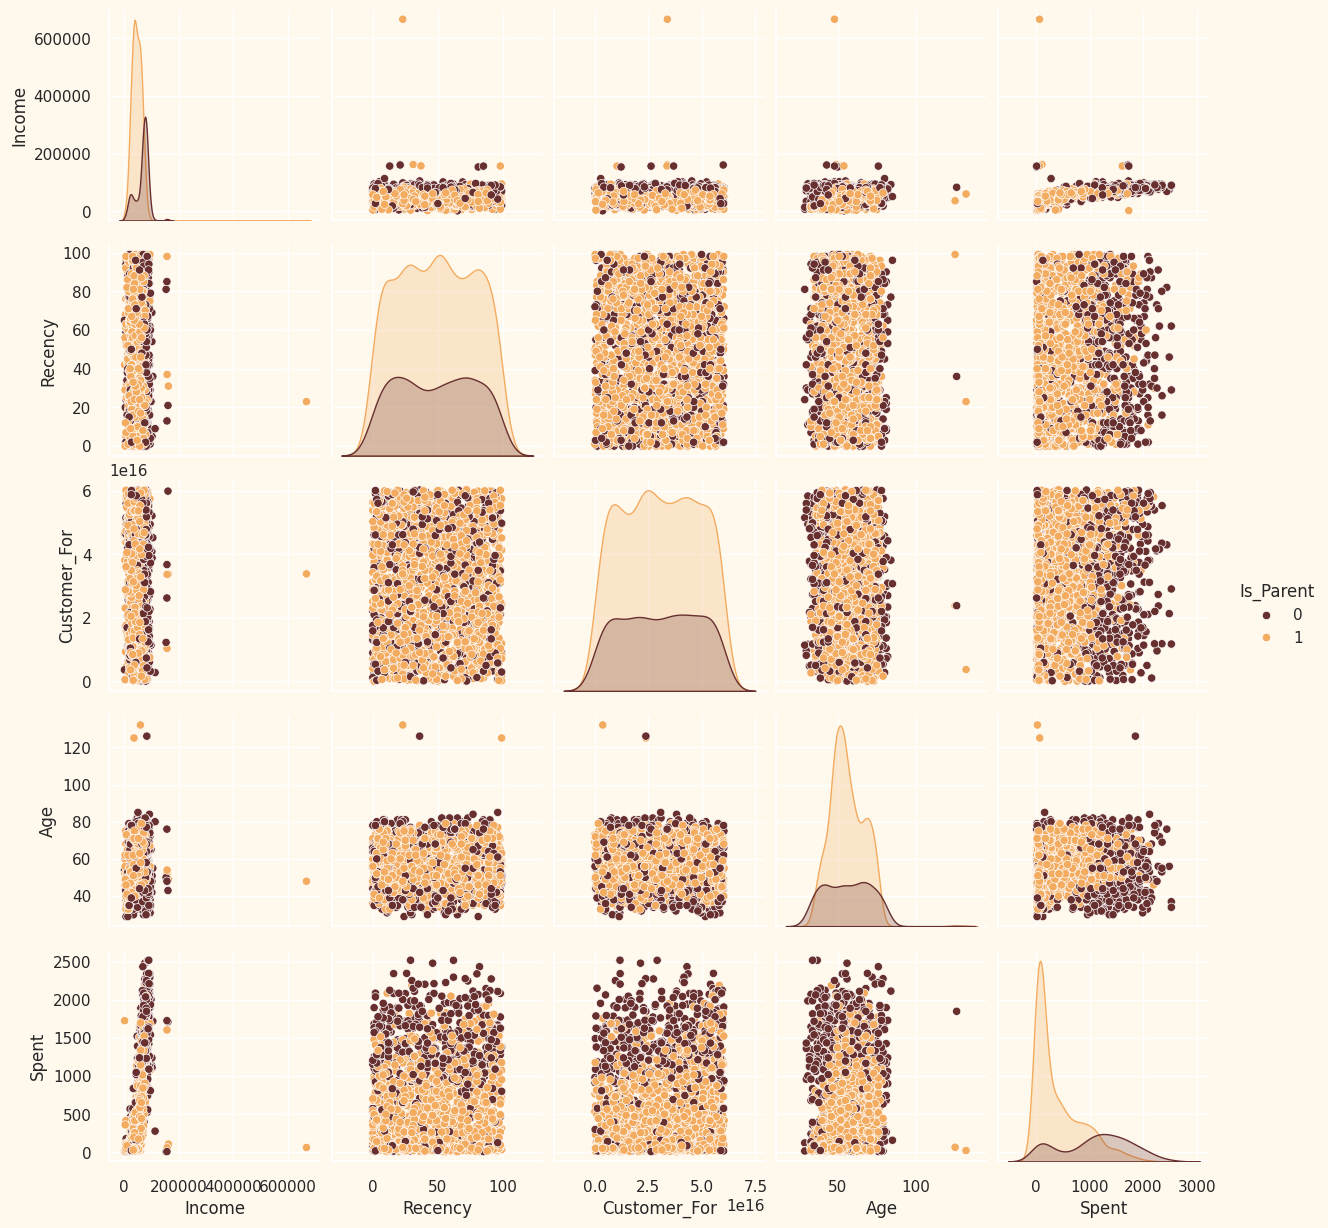

In [97]:
import matplotlib.colors as colors

# Set background color preferences
sns.set(rc={"axes.facecolor": "#FFF9ED", "figure.facecolor": "#FFF9ED"})
# Define custom colors
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(pallet)

features = ["Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
sns.pairplot(data[features], hue="Is_Parent", palette=["#682F2F", "#F3AB60"])
plt.show()

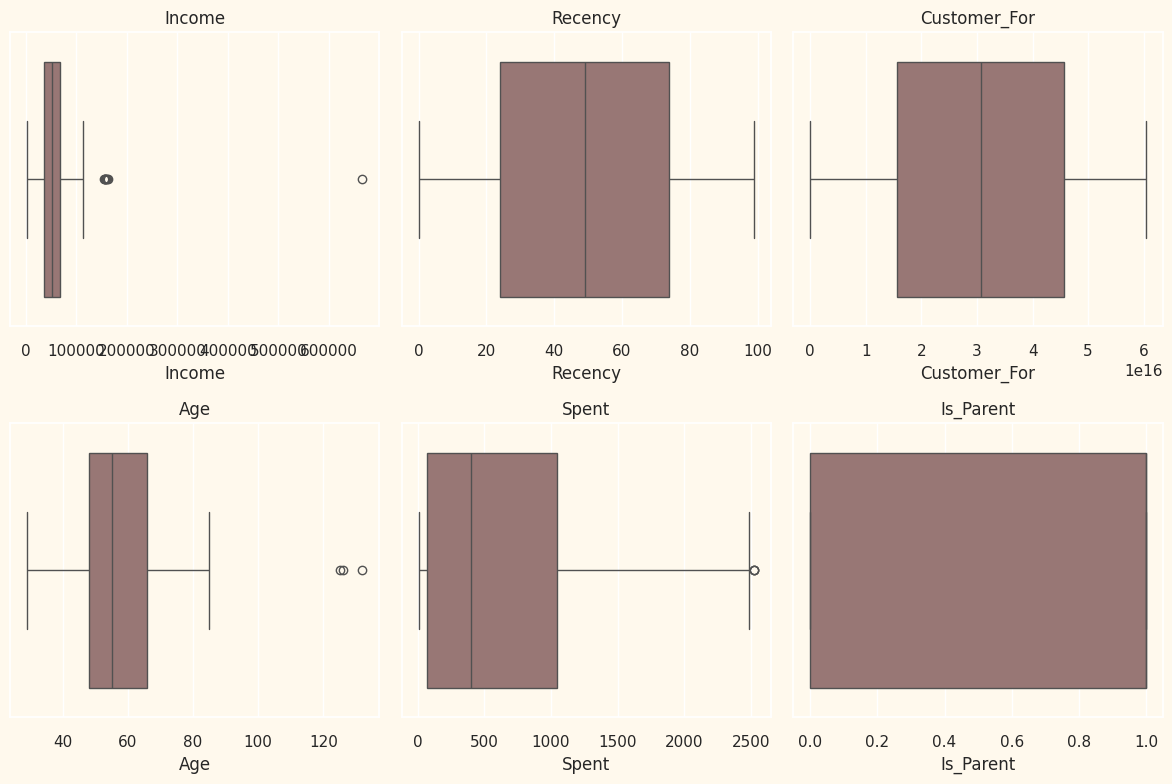

In [98]:
# Set background color preferences
sns.set(rc={"axes.facecolor": "#FFF9ED", "figure.facecolor": "#FFF9ED"})
features = ["Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]

plt.figure(figsize=(12, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=data[feature], color="#9E726F")
    plt.title(feature)

plt.tight_layout()
plt.show()


We can see that there have have some outliers in the data. we are gonna delate the outliers.

In [99]:
#Drop the Outliers
data=data[(data['Age'])<90]
data=data[(data['Income'])<600000]
print('Number of data points after removing outliers:',len(data))

Number of data points after removing outliers: 2212


Let's see correlation among the features

<Axes: >

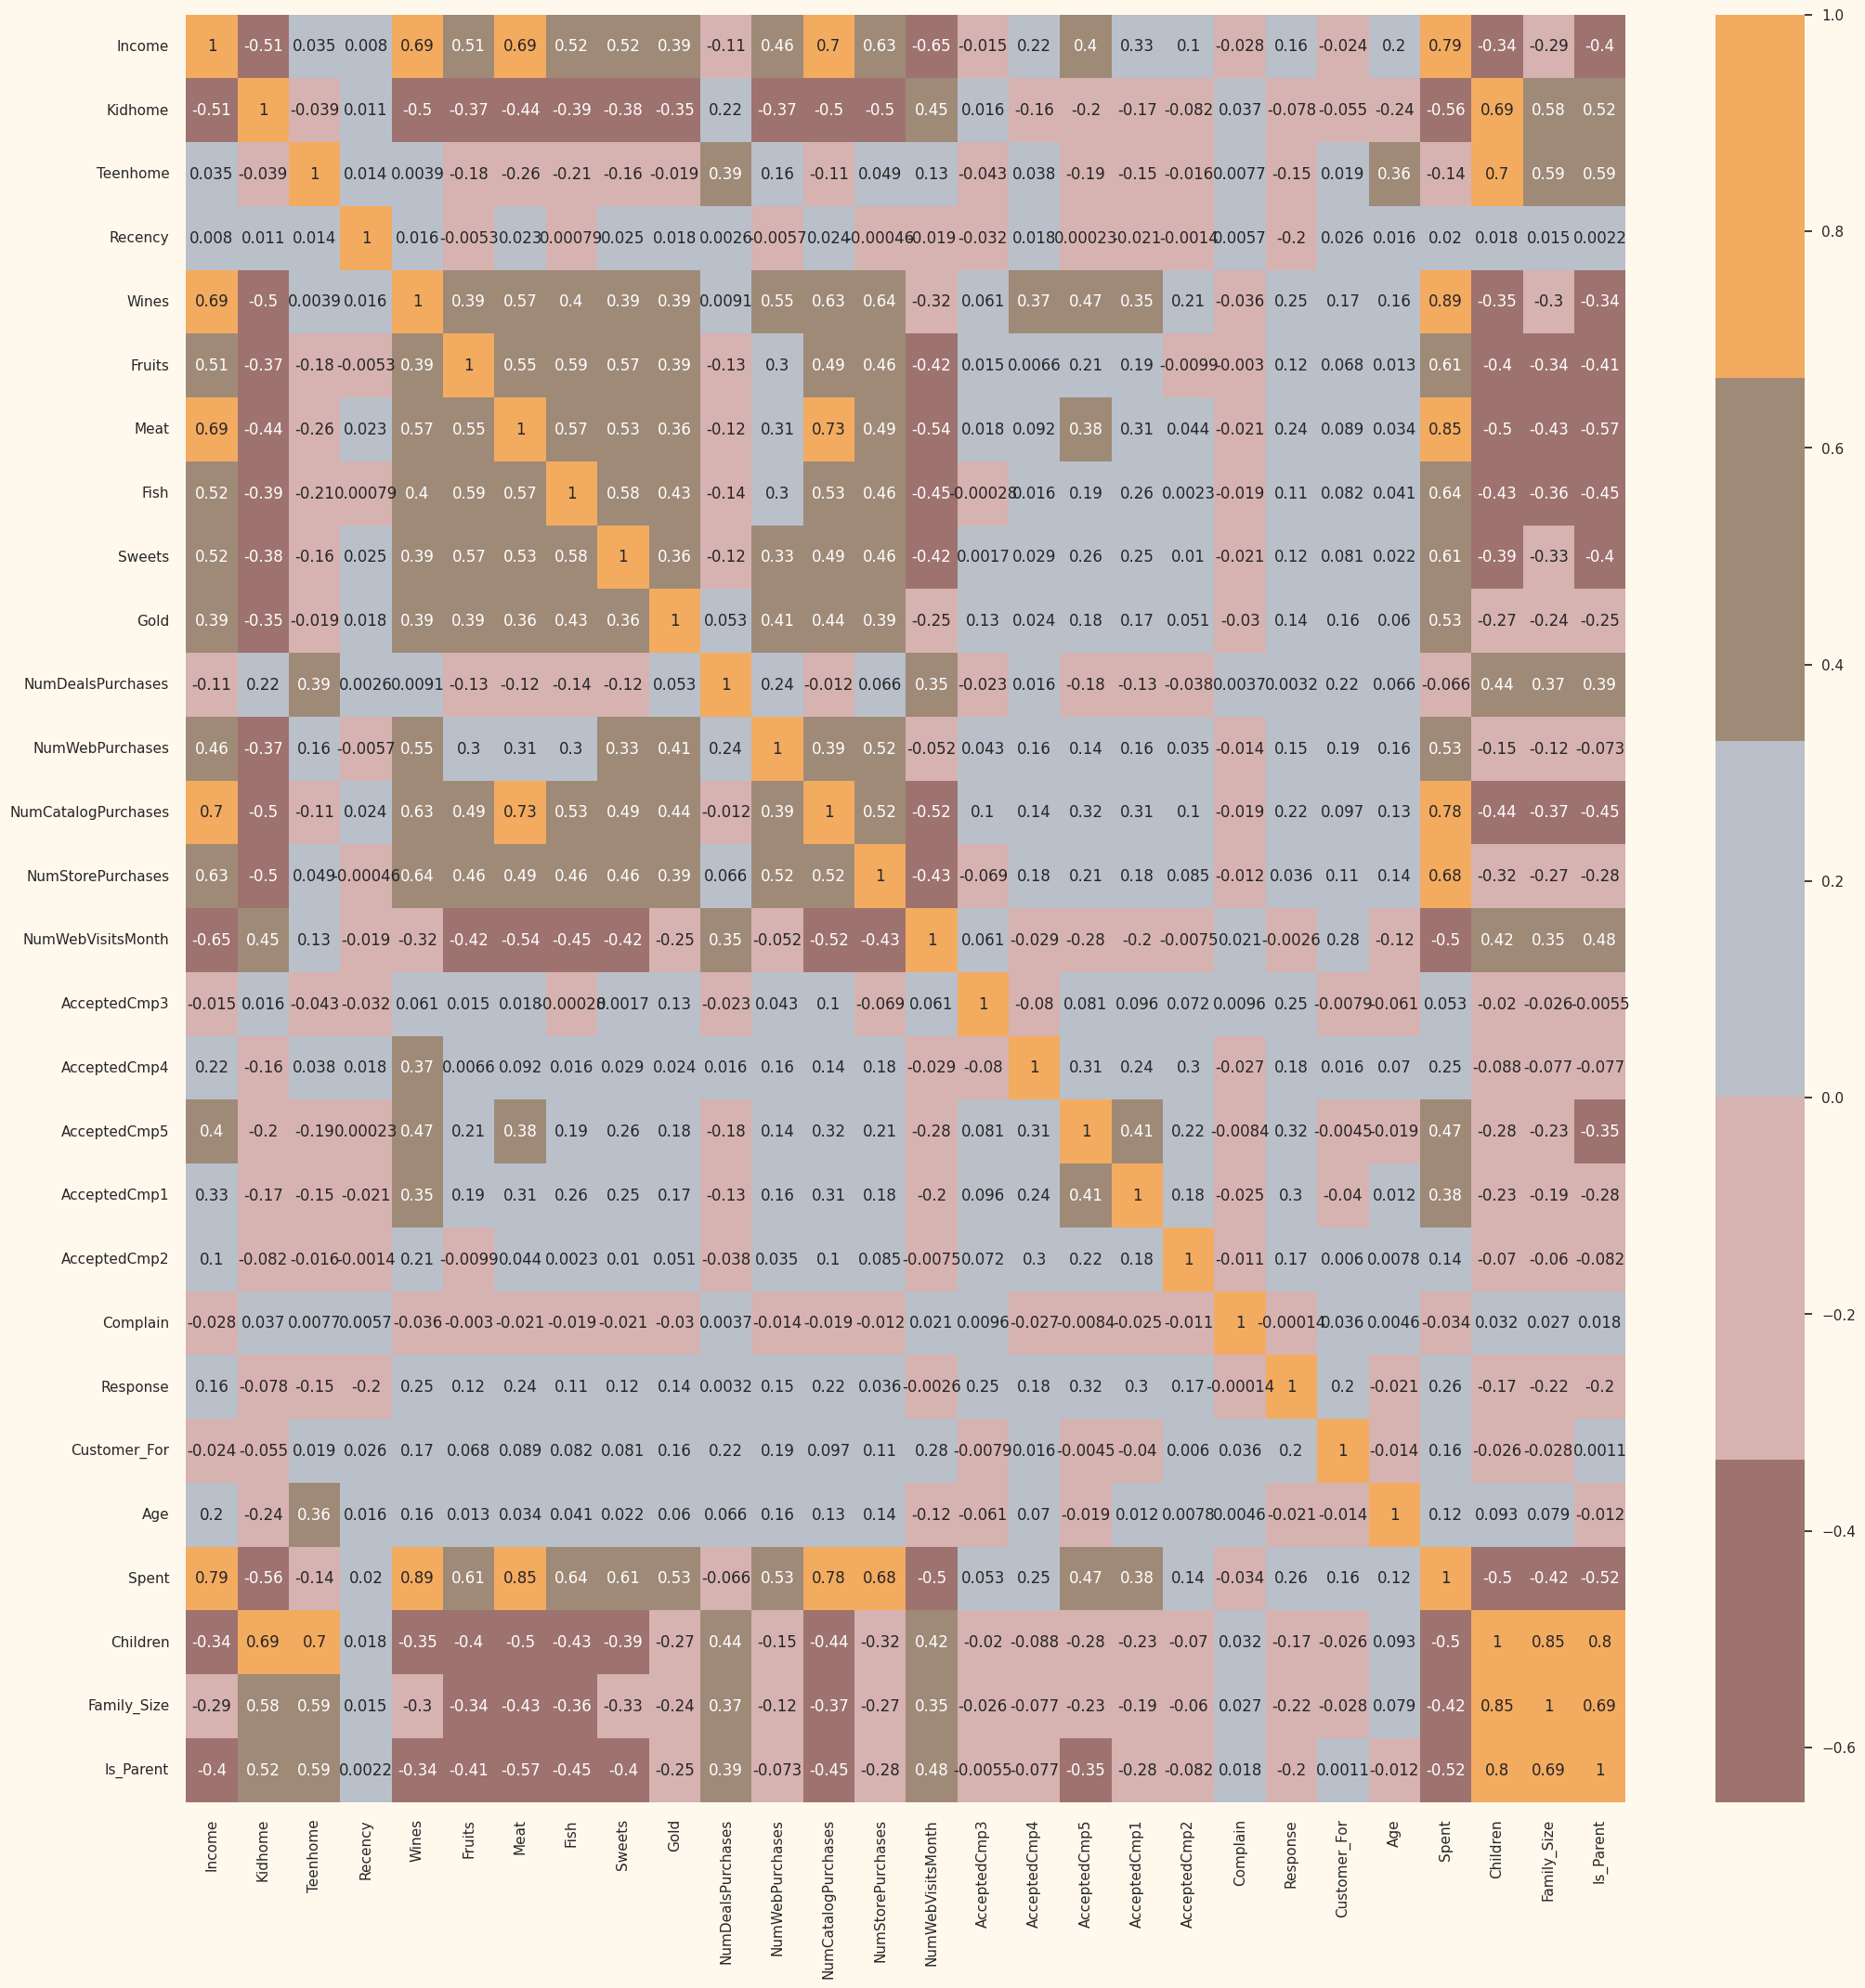

In [100]:
corrmat=data.select_dtypes(include=['number']).corr()
plt.figure(figsize=(25,25))
sns.heatmap(corrmat,annot=True,cmap=cmap,center=0)

<h1>**Data Preprocessing**</h1>
The following steps are applied to preprocess the data:

*   encoding the categorical features
*   Scaling the features using the standard scaler
*   Creating a subset dataframe for dimensionality reduction






In [101]:
#get list of categorical data
object_cols = list(data.select_dtypes(include=['object']).columns)
object_cols

['Education', 'Living_With']

In [102]:
print(data['Education'],'\n')
print(data['Living_With'])

0           Graduate
1           Graduate
2           Graduate
3           Graduate
4       Postgraduate
            ...     
2235        Graduate
2236    Postgraduate
2237        Graduate
2238    Postgraduate
2239    Postgraduate
Name: Education, Length: 2212, dtype: object 

0         Alone
1         Alone
2       Partner
3       Partner
4       Partner
         ...   
2235    Partner
2236    Partner
2237      Alone
2238    Partner
2239    Partner
Name: Living_With, Length: 2212, dtype: object


In [103]:
#apply label encoding for objet data types
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()

for col in object_cols:
  data[col]=Le.fit_transform(data[col])

In [104]:
from sklearn.preprocessing import StandardScaler
#copy of the data
df=data.copy()
#drop unnecessary columns
cols_to_drop=['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']
df.drop(df[cols_to_drop],axis=1)

scaler=StandardScaler()
scaled_df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

scaled_df.head()#preprocessed data to use in the model training


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,-0.117256,-0.09552,2.375425,1.527721,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.117256,-0.09552,-0.420977,-1.189011,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.117256,-0.09552,-0.420977,-0.206048,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.117256,-0.09552,-0.420977,-1.060584,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,-0.117256,-0.09552,-0.420977,-0.951915,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


<h1>Dimentionality Reduction</h1>

Dimensionality reduction with PCA

In [105]:
#Dimensionality reduction with PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
pca.fit(scaled_df)
pca_df=pd.DataFrame(pca.transform(scaled_df),columns=(['cols1','cols2','cols3']))
pca_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cols1,2212.0,0.000000e+00,2.960584,-5.924203,-2.556960,-0.861996,2.264130,8.537423
cols2,2212.0,-7.066881e-17,1.717094,-4.159721,-1.348514,-0.159643,1.248451,6.063281
cols3,2212.0,2.087942e-17,1.389410,-3.187281,-0.785437,-0.164566,0.411754,8.246061


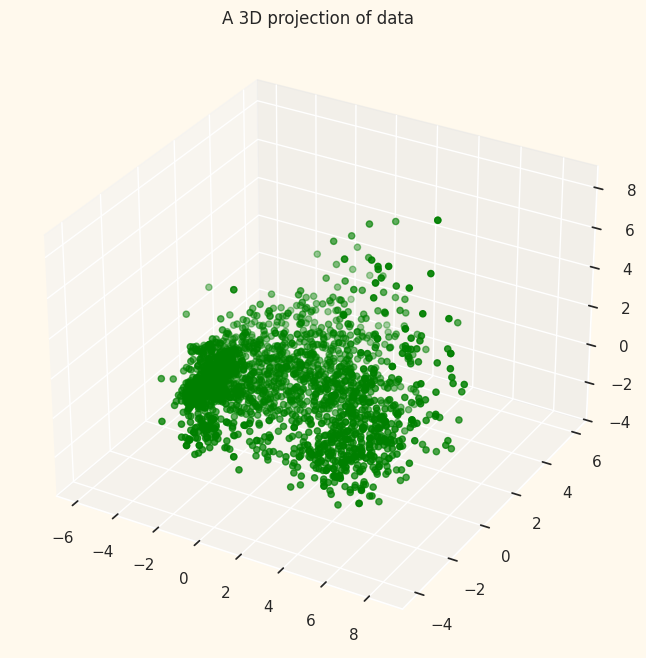

In [106]:
x=pca_df['cols1']
y=pca_df['cols2']
z=pca_df['cols3']

fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x,y,z,c='green',marker='o')
ax.set_title('A 3D projection of data')
plt.show()

<h1>CLUSTERING</h1>

Steps involved in the Clustering

*   Elbow Method to determine the number of clusters to be formed
*   Clustering via Agglomerative Clustering
*   Examining the clusters formed via scatter plot



Elbow Method to determine the number of clusters to be formed:


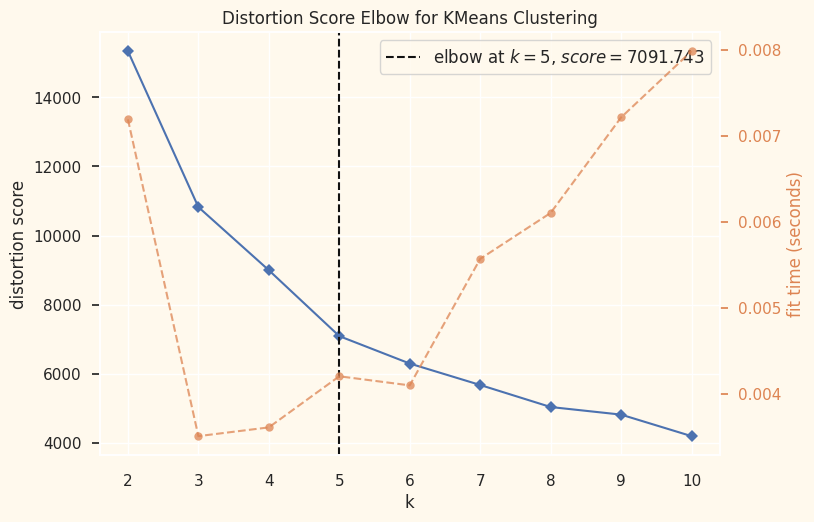

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [107]:
# Quick examination of elbow method to find numbers of clusters to make.
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
print('Elbow Method to determine the number of clusters to be formed:')
elbow_M = KElbowVisualizer(KMeans(),k=10)
elbow_M.fit(pca_df)
elbow_M.show()

The above cell indicates that five will be an optimal number of clusters for this data. Next, we will be fitting the Agglomerative Clustering Model to get the final clusters.

In [114]:
#initialize the agglomerative clustring model
from sklearn.cluster import AgglomerativeClustering
AC = AgglomerativeClustering(n_clusters=5)
yhat_ac=AC.fit_predict(pca_df)
pca_df['Clusters']=yhat_ac
data['Clusters']=yhat_ac

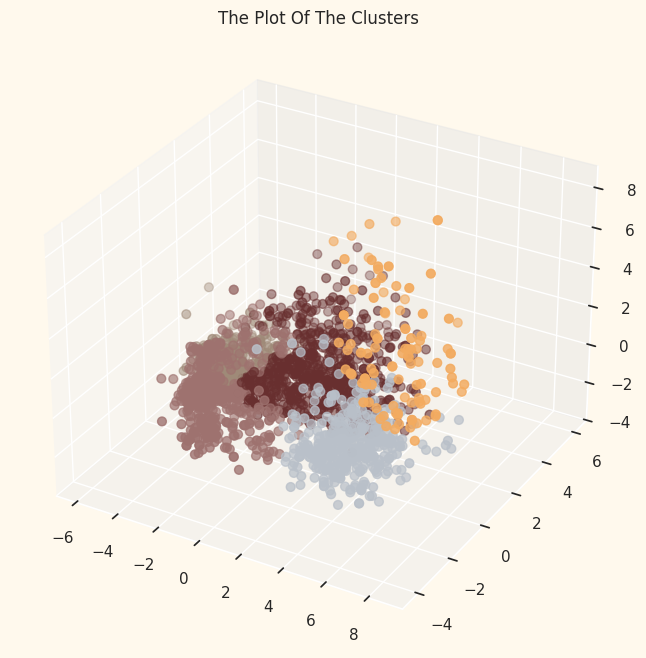

In [115]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=pca_df["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

EVALUATING MODELS

Firstly, let us have a look at the group distribution of clustring

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   int64  
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   int64  
 3   Teenhome             2212 non-null   int64  
 4   Recency              2212 non-null   int64  
 5   Wines                2212 non-null   int64  
 6   Fruits               2212 non-null   int64  
 7   Meat                 2212 non-null   int64  
 8   Fish                 2212 non-null   int64  
 9   Sweets               2212 non-null   int64  
 10  Gold                 2212 non-null   int64  
 11  NumDealsPurchases    2212 non-null   int64  
 12  NumWebPurchases      2212 non-null   int64  
 13  NumCatalogPurchases  2212 non-null   int64  
 14  NumStorePurchases    2212 non-null   int64  
 15  NumWebVisitsMonth    2212 non-null   int64 

<ipython-input-117-abf93f980498>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=data["Clusters"], palette= pal)


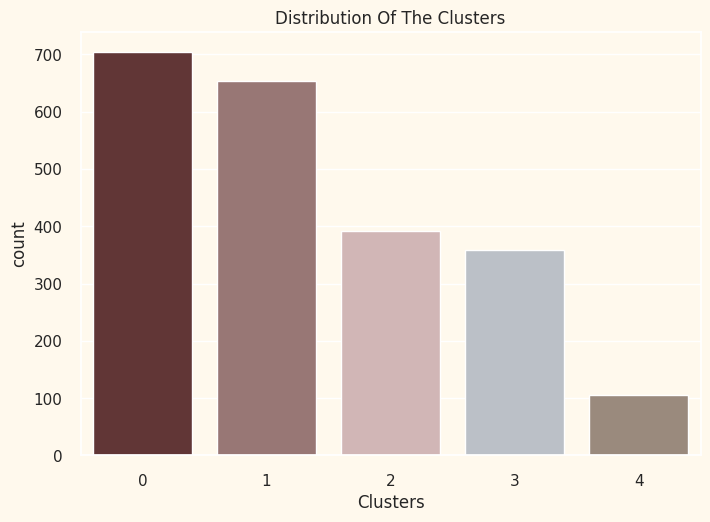

In [117]:
#Plotting countplot of clusters
pal = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78"]
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

The clusters seem to be fairly distributed

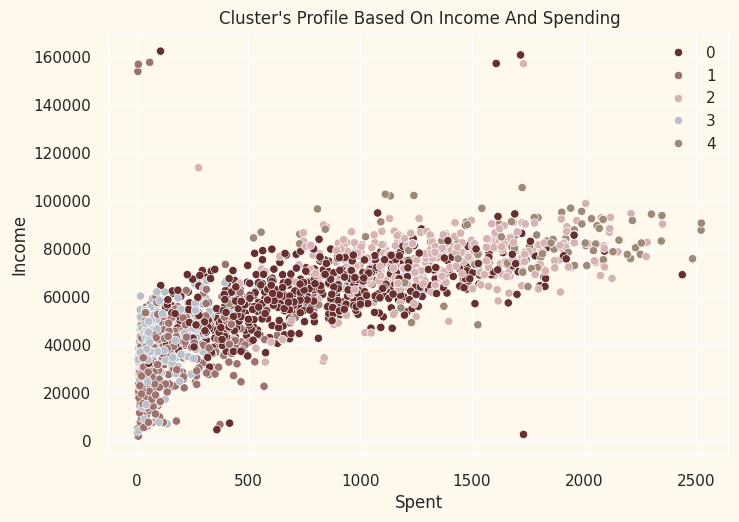

In [118]:
pl = sns.scatterplot(data = df,x=data["Spent"], y=data["Income"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

Income vs spending plot shows the clusters pattern
*   group 0: high spending & average income
*   group 1: high spending & high income
*   group 2: low spending & low income
*   group 3: high spending & low income

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 32.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 74.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 8.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 66.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-119-b5a4c0fdc6d1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will

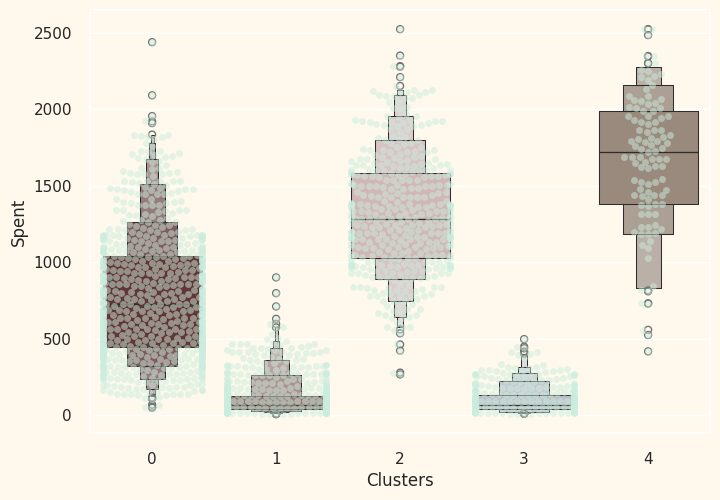

In [119]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=pal)
plt.show()

From the above plot, it can be clearly seen that cluster 2 is our biggest set of customers closely followed by cluster 0. We can explore what each cluster is spending on for the targeted marketing strategies.

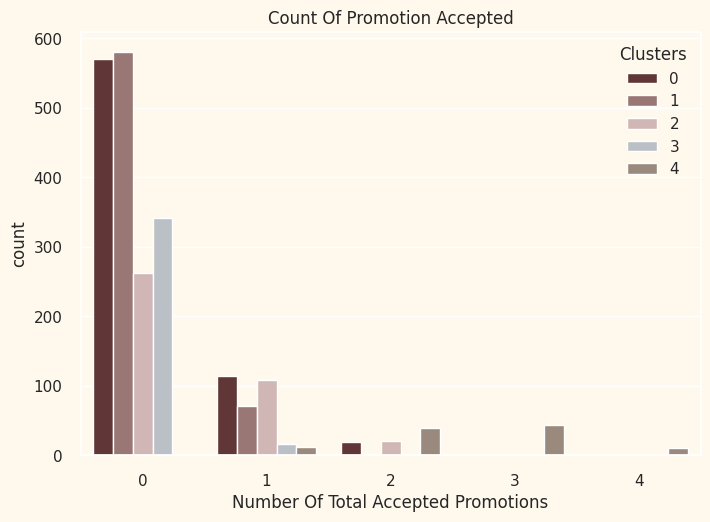

In [120]:
#Creating a feature to get a sum of accepted promotions
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

There has not been an overwhelming response to the campaigns so far. Very few participants overall. Moreover, no one part take in all 5 of them. Perhaps better-targeted and well-planned campaigns are required to boost sales.

<ipython-input-121-0ef84d1c8fe9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"], palette= pal)


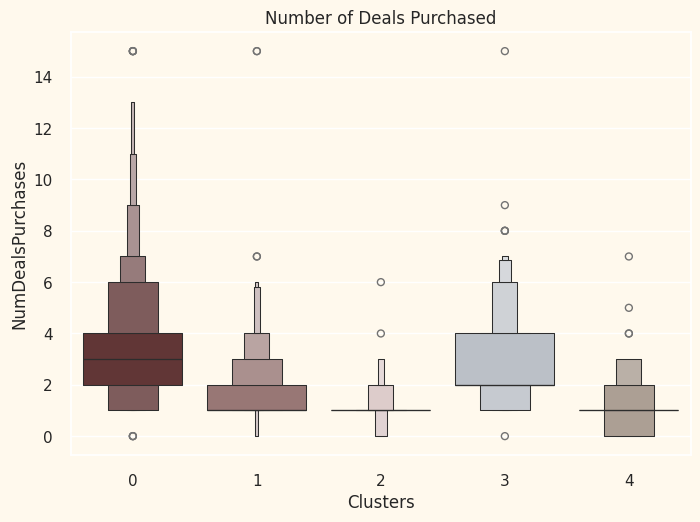

In [121]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

Unlike campaigns, the deals offered did well. It has best outcome with cluster 0 and cluster 3. However, our star customers cluster 2 are not much into the deals. Nothing seems to attract cluster 4 overwhelmingly.

<h1>Peofiling</h1>

Now that we have formed the clusters and analyzed their purchasing habits, the next step is to profile these clusters to gain deeper insights into our customers.

By examining key demographic and behavioral features, we can identify:

*   **Star customers** – those who contribute the most value.
*   **Customers who need more attention** – those with potential for better engagement.


To achieve this, we will visualize and analyze customer traits in relation to their assigned clusters. Based on these insights, we will draw meaningful conclusions about marketing strategies, customer retention, and targeted promotions for the retail store.

<Figure size 800x550 with 0 Axes>

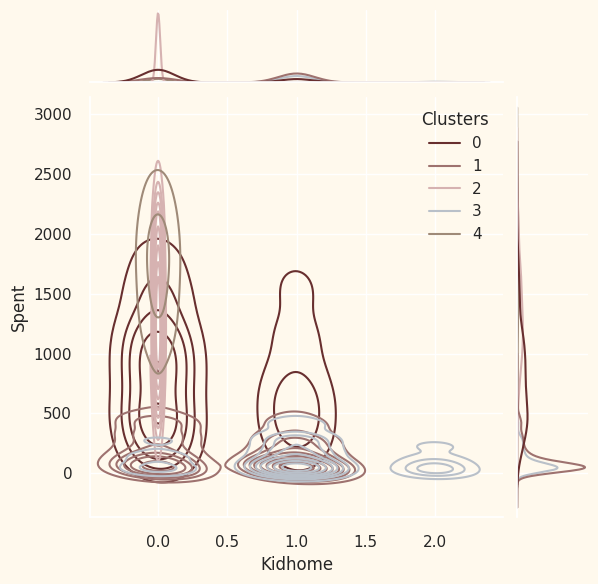

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1883: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 800x550 with 0 Axes>

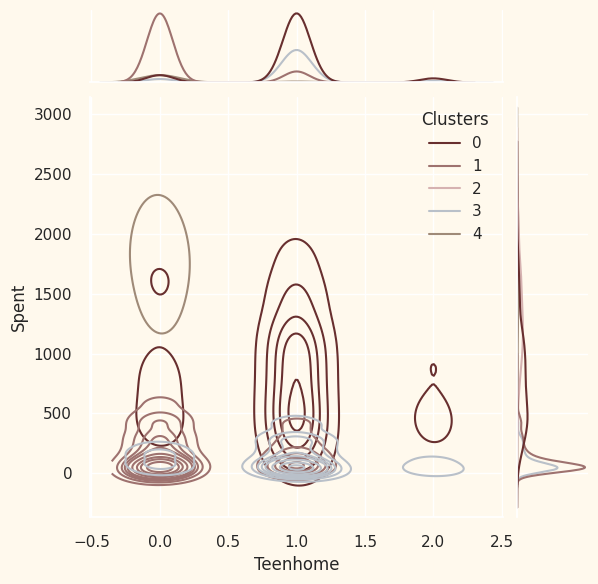

<Figure size 800x550 with 0 Axes>

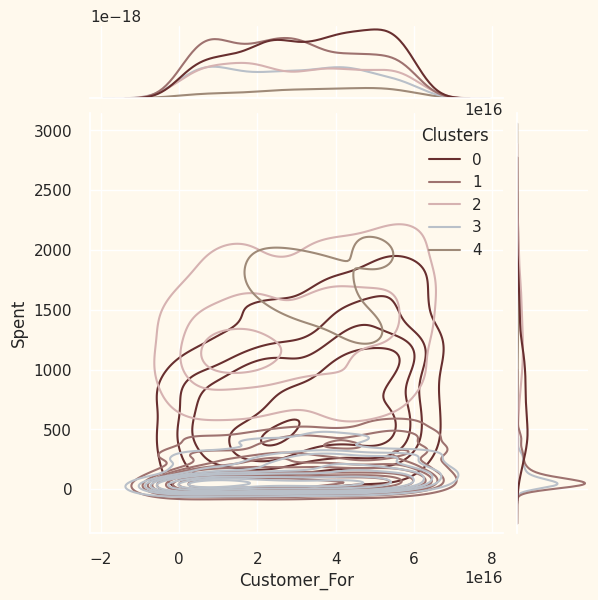

<Figure size 800x550 with 0 Axes>

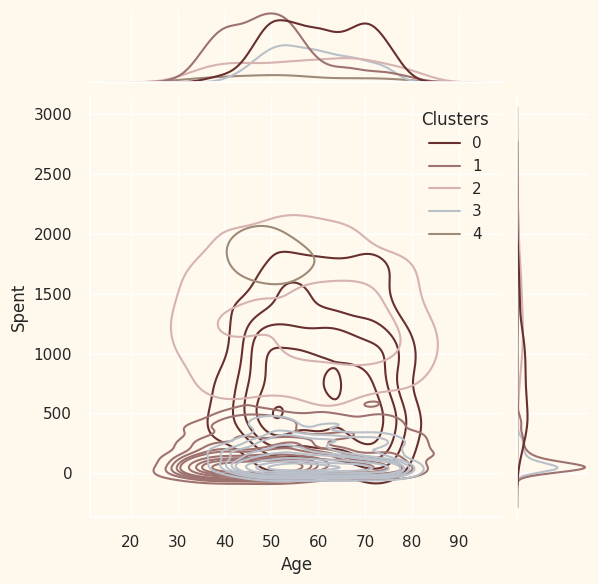

<Figure size 800x550 with 0 Axes>

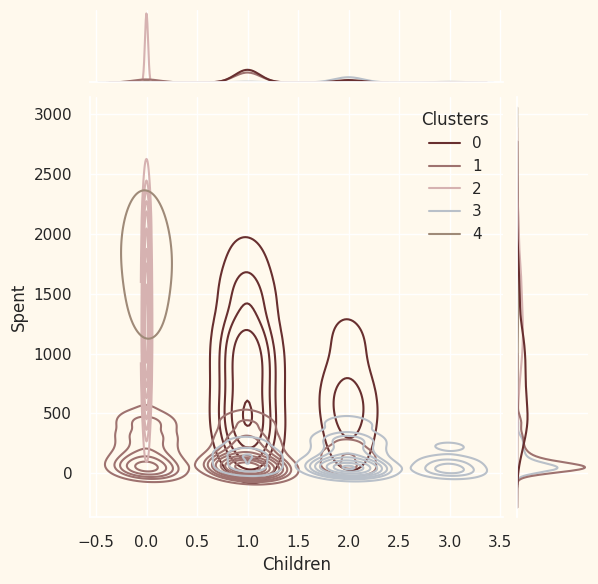

<Figure size 800x550 with 0 Axes>

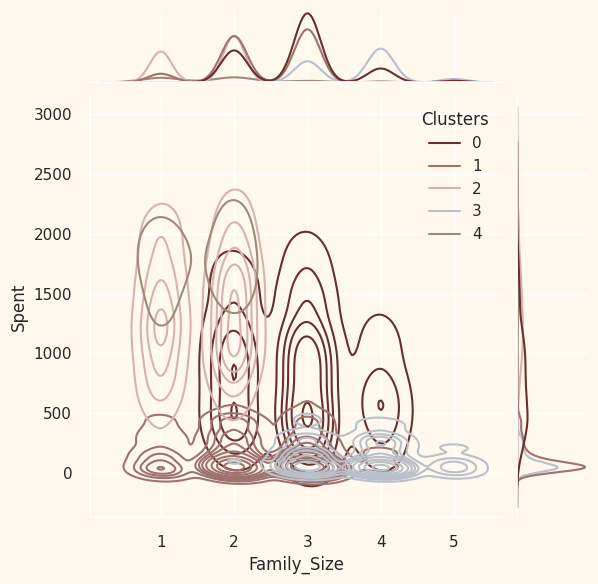

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1883: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 800x550 with 0 Axes>

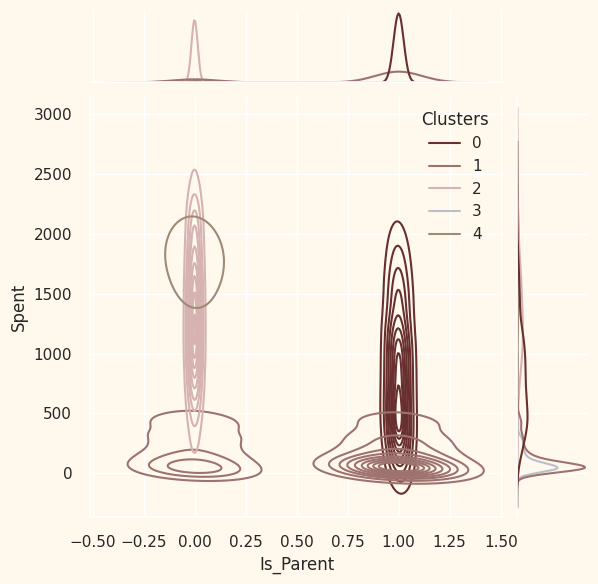

<Figure size 800x550 with 0 Axes>

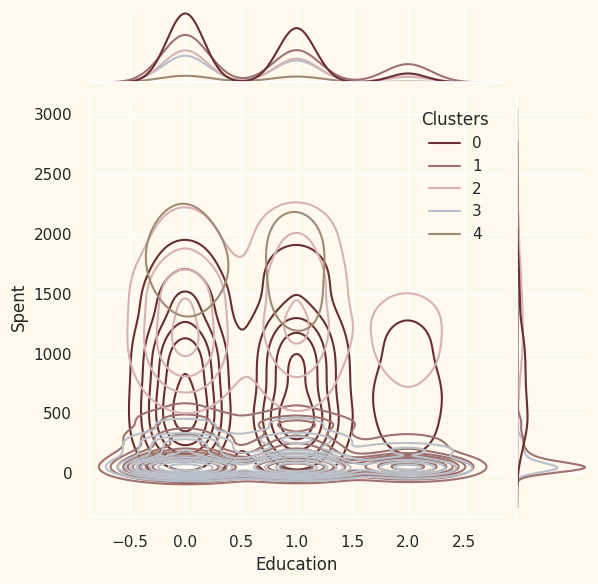

<Figure size 800x550 with 0 Axes>

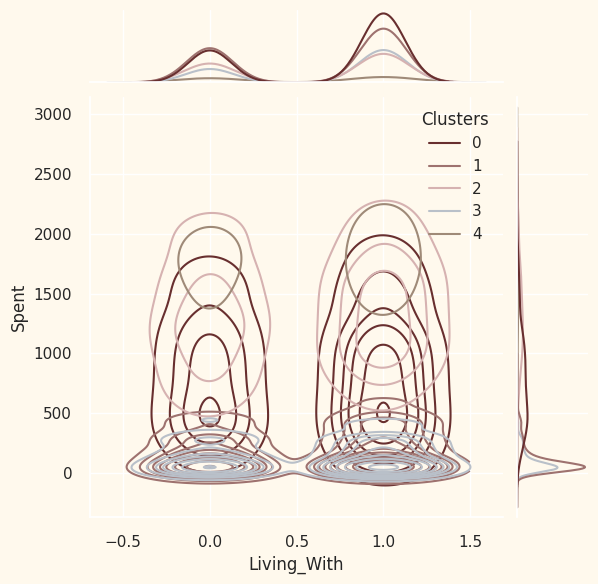

In [122]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue =data["Clusters"], kind="kde", palette=pal)
    plt.show()

At the end,
Here, in this project I performed unsupervised clustering. I did use dimensionality reduction followed by agglomerative clustering. I came up with 5 clusters and further used them in profiling customers in clusters according to their family structures and income/spending. This can be used in planning better marketing strategies.